<a href="https://colab.research.google.com/github/maitena-11g/carpetamay/blob/main/Givemecredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicción temprana de riesgo crediticio en adolescentes mediante Machine Learning**


Se entrena un modelo de Machine Learning con el objetivo de predecir el riesgo crediticio futuro, basándonos en información socioeconómica disponible en datasets financieros reales. Usando el dataset público “Give Me Some Credit”, que contiene información de clientes, incluyendo edad, número de dependientes, ingresos mensuales, atrasos en pagos y deudas acumuladas.

presentacion del proyecto link aqui: https://www.canva.com/design/DAGx4K7ObvQ/3BM0HQ-lc_W_IY6zZbtYpw/edit?utm_content=DAGx4K7ObvQ&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving give_me_some_credit.zip to give_me_some_credit (1).zip


In [ ]:
import zipfile
import os

zip_path = "give_me_some_credit.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("gmsc")  # crea una carpeta llamada gmsc

# Listar archivos dentro
os.listdir("gmsc")


['sampleEntry.csv', 'cs-training.csv', 'cs-test.csv', 'Data Dictionary.xls']

In [ ]:
import pandas as pd
train_df = pd.read_csv("gmsc/cs-training.csv")
print(train_df.shape)
train_df.head()



(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
train_df.isnull()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,False,False,False,False,False,False,False,False,False,False,False,False
149996,False,False,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,False,True,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train_df.isnull().sum (axis=0)

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [ ]:
train_df.isnull().sum (axis=0)*100 / len (train_df)

,0
Unnamed: 0,0.000000
SeriousDlqin2yrs,0.000000
RevolvingUtilizationOfUnsecuredLines,0.000000
age,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0.000000
DebtRatio,0.000000
MonthlyIncome,19.820667
NumberOfOpenCreditLinesAndLoans,0.000000
NumberOfTimes90DaysLate,0.000000
NumberRealEstateLoansOrLines,0.000000


NameError: name 'bar' is not defined

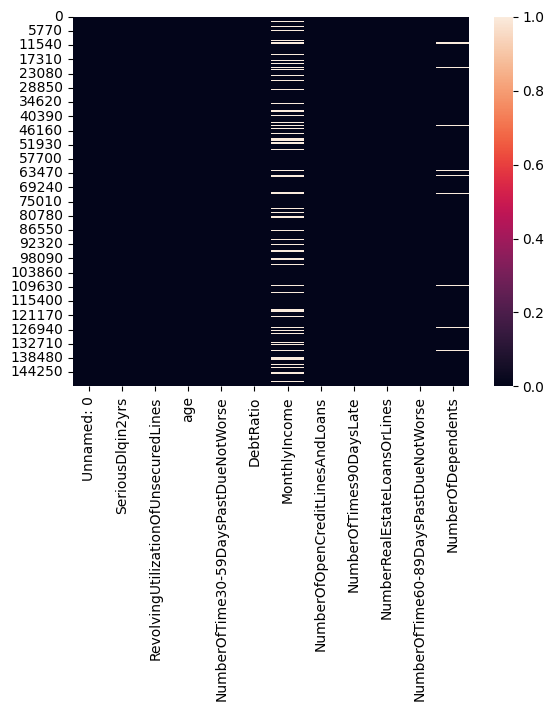

In [ ]:
#mapeo para ver de otra forma las variables con datos nulos
import seaborn as sns
sns.heatmap (train_df.isnull()), (bar== False , ticklabels == False)


In [ ]:
#tratamiento de valores nulos (imputacion)
#se decide crear grupos calculando la mediana de ingresos por edad porque genera un resultado mas realista, si decidiamos hacer la mediana global podia ser poco representativo y la media podia verse perjudicada por outliers
# 2. Crear grupos de edad (bins)
bins = [0, 20, 30, 40, 50, 60, 70, 80, 120]  # rangos de edad
labels = ['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+']
train_df['AgeGroup'] = pd.cut(train_df['age'], bins=bins, labels=labels, right=False)

# se calcula la mediana de ingresos por grupo de edad
income_median_by_age = train_df.groupby('AgeGroup')['MonthlyIncome'].median()

# 4. Imputar valores nulos en MonthlyIncome
train_df['MonthlyIncome'] = train_df.apply(
    lambda row: income_median_by_age[row['AgeGroup']] if pd.isna(row['MonthlyIncome']) else row['MonthlyIncome'],
    axis=1
)


/tmp/ipython-input-97110146.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_median_by_age = train_df.groupby('AgeGroup')['MonthlyIncome'].median()


In [ ]:

print("Valores nulos en MonthlyIncome después de imputar:", train_df['MonthlyIncome'].isnull().sum())


In [ ]:

print("\nMedianas de ingreso mensual por grupo de edad:")
print(income_median_by_age)

In [ ]:
#tratamiento para NumberOfDependents

#Imputación de MonthlyIncome por grupo de edad
bins = [0, 20, 30, 40, 50, 60, 70, 80, 120]
labels = ['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+']
train_df['AgeGroup'] = pd.cut(train_df['age'], bins=bins, labels=labels, right=False)

income_median_by_age = train_df.groupby('AgeGroup')['MonthlyIncome'].median()

train_df['MonthlyIncome'] = train_df.apply(
    lambda row: income_median_by_age[row['AgeGroup']] if pd.isna(row['MonthlyIncome']) else row['MonthlyIncome'],
    axis=1
)

#  Imputación de NumberOfDependents
# Como es una variable categórica-discreta (0,1,2,3...), se imputa con la moda (valor más común)
mode_dependents = train_df['NumberOfDependents'].mode()[0]
train_df['NumberOfDependents'] = train_df['NumberOfDependents'].fillna(mode_dependents)

#  Verificación
print("Nulos en MonthlyIncome:", train_df['MonthlyIncome'].isnull().sum())
print("Nulos en NumberOfDependents:", train_df['NumberOfDependents'].isnull().sum())

print("\nMedianas de ingreso por grupo de edad:")
print(income_median_by_age)

print("\nModa de dependientes usada para imputar:", mode_dependents)


/tmp/ipython-input-3403208826.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_median_by_age = train_df.groupby('AgeGroup')['MonthlyIncome'].median()


Nulos en MonthlyIncome: 0
Nulos en NumberOfDependents: 0

Medianas de ingreso por grupo de edad:
AgeGroup
<20      6000.0
20-29    2557.0
30-39    4666.0
40-49    6000.0
50-59    6333.0
60-69    5918.5
70-79    4700.5
80+      4166.0
Name: MonthlyIncome, dtype: float64

Moda de dependientes usada para imputar: 0.0


In [ ]:
train_df.shape

(150000, 13)

In [ ]:
train_df.isnull().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [ ]:
train_df.head(15)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,AgeGroup
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,40-49
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,40-49
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,30-39
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,30-39
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,40-49
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,70-79
6,7,0,0.305682,57,0,5710.000000,6333.0,8,0,3,0,0.0,50-59
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0,30-39
8,9,0,0.116951,27,0,46.000000,2557.0,2,0,0,0,0.0,20-29
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0,50-59


In [ ]:
train_df.duplicated(keep="first")

,0
0,False
1,False
2,False
3,False
4,False
...,...
149995,False
149996,False
149997,False
149998,False


NameError: name 'bar' is not defined

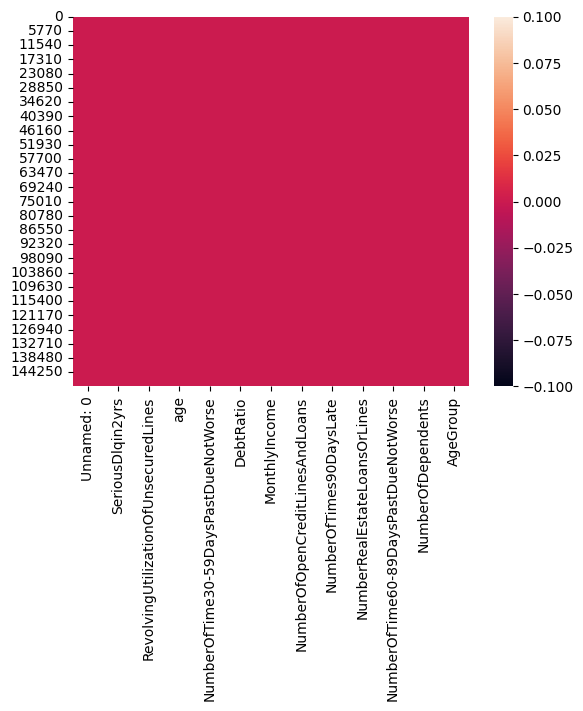

In [ ]:
import seaborn as sns
sns.heatmap (train_df.isnull()), (bar== False , ticklabels == False)


In [ ]:
train_df.value_counts()

,,,,,,,,,,,,,count
Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,AgeGroup,
149984,0,0.002485,82,0,0.000800,5000.0,5,0,0,0,0.0,80+,1
149983,0,0.021046,37,0,0.250272,2760.0,8,0,0,0,3.0,30-39,1
149982,0,0.810012,43,0,0.121752,6849.0,4,0,0,0,4.0,40-49,1
149981,0,0.067644,64,0,0.254976,5525.0,12,0,1,0,0.0,60-69,1
149980,1,0.224711,55,0,0.057235,8700.0,7,0,0,0,0.0,50-59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,40-49,1
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,30-39,1
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,30-39,1


In [ ]:
import pandas as pd

# Función para detectar outliers con método IQR
def detectar_outliers_iqr(train_df, col, k=1.5):
    q1 = train_df[col].quantile(0.25)
    q3 = train_df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    outliers = train_df[(train_df[col] < lower) | (train_df[col] > upper)]
    return outliers, lower, upper

# Aplicamos la función a cada variable numérica clave
num_vars = [
    "RevolvingUtilizationOfUnsecuredLines",
    "age",
    "DebtRatio",
    "MonthlyIncome",
    "NumberOfOpenCreditLinesAndLoans",
    "NumberOfTimes90DaysLate",
    "NumberRealEstateLoansOrLines",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfTime30-59DaysPastDueNotWorse"
]

for col in num_vars:
    outliers, low, up = detectar_outliers_iqr(train_df, col)
    print(f"--- {col} ---")
    print(f"Outliers detectados: {len(outliers)}")
    print(f"Rango aceptable: [{low:.2f}, {up:.2f}]")
    print()


--- RevolvingUtilizationOfUnsecuredLines ---
Outliers detectados: 763
Rango aceptable: [-0.76, 1.35]

--- age ---
Outliers detectados: 46
Rango aceptable: [8.00, 96.00]

--- DebtRatio ---
Outliers detectados: 31311
Rango aceptable: [-0.86, 1.91]

--- MonthlyIncome ---
Outliers detectados: 8882
Rango aceptable: [-1600.00, 12800.00]

--- NumberOfOpenCreditLinesAndLoans ---
Outliers detectados: 3980
Rango aceptable: [-4.00, 20.00]

--- NumberOfTimes90DaysLate ---
Outliers detectados: 8338
Rango aceptable: [0.00, 0.00]

--- NumberRealEstateLoansOrLines ---
Outliers detectados: 793
Rango aceptable: [-3.00, 5.00]

--- NumberOfTime60-89DaysPastDueNotWorse ---
Outliers detectados: 7604
Rango aceptable: [0.00, 0.00]

--- NumberOfTime30-59DaysPastDueNotWorse ---
Outliers detectados: 23982
Rango aceptable: [0.00, 0.00]



In [ ]:
# Winsorización usando los límites calculados
for col in num_vars:
    outliers, low, up = detectar_outliers_iqr(train_df, col)
    train_df[col] = train_df[col].clip(lower=low, upper=up)

print("Outliers tratados: valores extremos recortados a los límites IQR.")


Outliers tratados: valores extremos recortados a los límites IQR.


In [ ]:
import numpy as np

In [ ]:

train_df['MonthlyIncome_log1p']= np.log1p(train_df['MonthlyIncome'])
train_df['MonthlyIncome_log1p']= np.log1p(train_df['MonthlyIncome'])


In [ ]:
#se carga la parte de testeo
df_test  = pd.read_csv('gmsc/cs-test.csv')

In [ ]:
#feature Enginnering
# Income per capita
train_df['IncomePerCapita'] = train_df['MonthlyIncome'] / (train_df['NumberOfDependents'] + 1)
df_test['IncomePerCapita']  = df_test['MonthlyIncome'] / (df_test['NumberOfDependents'] + 1)

# Total de atrasos pasados
train_df['TotalPastDue'] = (
    train_df['NumberOfTime30-59DaysPastDueNotWorse'] +
    train_df['NumberOfTime60-89DaysPastDueNotWorse'] +
   train_df['NumberOfTimes90DaysLate']
)
df_test['TotalPastDue'] = (
    df_test['NumberOfTime30-59DaysPastDueNotWorse'] +
    df_test['NumberOfTime60-89DaysPastDueNotWorse'] +
    df_test['NumberOfTimes90DaysLate']
)

# Credit lines per age
train_df['CreditLinesPerAge'] = train_df['NumberOfOpenCreditLinesAndLoans'] / train_df['age']
df_test['CreditLinesPerAge'] = df_test['NumberOfOpenCreditLinesAndLoans'] / df_test['age']


In [ ]:

# variable objetivo
target = 'SeriousDlqin2yrs'

# Variables numéricas del dataset
num_vars = [
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberRealEstateLoansOrLines',
    'NumberOfDependents'
]

# Resumen comparativo entre clientes con y sin morosidad
summary_rows = []

for col in num_vars + ['IncomePerCapita','TotalPastDue','CreditLinesPerAge']:
    data = train_df[[col, target]].dropna()

    grp0 = data[data[target] == 0][col]  # clientes sin morosidad
    grp1 = data[data[target] == 1][col]  # clientes con morosidad

    mean0, mean1 = grp0.mean(), grp1.mean()
    std0, std1 = grp0.std(), grp1.std()

    try:
        _, p_mwu = mannwhitneyu(grp0, grp1, alternative='two-sided')
    except:
        p_mwu = np.nan

    # Correlación
    try:
        r_pb, p_pb = pointbiserialr(data[target], data[col])
    except:
        r_pb, p_pb = (np.nan, np.nan)

    summary_rows.append({
        "variable": col,
        "mean_target0": round(mean0, 2),
        "mean_target1": round(mean1, 2),
        "std0": round(std0, 2),
        "std1": round(std1, 2),
        "mwu_pval": round(p_mwu, 5),
        "pb_r": round(r_pb, 3),
        "pb_pval": round(p_pb, 5)
    })

summary_num = pd.DataFrame(summary_rows).sort_values("mwu_pval")
summary_num


,variable,mean_target0,mean_target1,std0,std1,mwu_pval,pb_r,pb_pval
0,RevolvingUtilizationOfUnsecuredLines,0.30,0.70,0.34,0.37,NaN,NaN,NaN
1,age,52.75,45.93,14.79,12.91,NaN,NaN,NaN
2,DebtRatio,0.66,0.67,0.69,0.65,NaN,NaN,NaN
3,MonthlyIncome,5945.78,5219.04,3103.58,2879.84,NaN,NaN,NaN
4,NumberOfOpenCreditLinesAndLoans,8.37,7.74,4.70,5.20,NaN,NaN,NaN
5,NumberRealEstateLoansOrLines,1.01,0.94,1.01,1.16,NaN,NaN,NaN
6,NumberOfDependents,0.72,0.93,1.10,1.21,NaN,NaN,NaN
7,IncomePerCapita,4323.25,3548.78,2780.21,2550.84,NaN,NaN,NaN
8,TotalPastDue,0.00,0.00,0.00,0.00,NaN,NaN,NaN
9,CreditLinesPerAge,0.17,0.17,0.10,0.11,NaN,NaN,NaN


Graficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# Distribución de la variable target (incumplimiento)
plt.figure(figsize=(6,4))
plt.pie(x='SeriousDlqin2yrs', data=train_df)
plt.title('Distribución de la Variable Target (Incumplimiento de Pago)')
plt.xlabel('SeriousDlqin2yrs (1 = incumplimiento, 0 = cumplimiento)')
plt.ylabel('Cantidad de clientes')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7e0f2847e200> (for post_execute):


KeyboardInterrupt: 

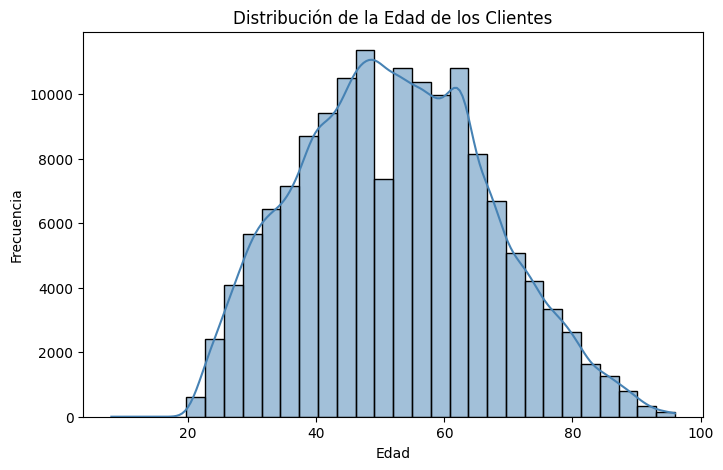

In [ ]:
# Distribución de edades
plt.figure(figsize=(8,5))
sns.histplot(train_df['age'], bins=30, kde=True, color='steelblue')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


/tmp/ipython-input-3578239740.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('AgeGroup')['SeriousDlqin2yrs']
/tmp/ipython-input-3578239740.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


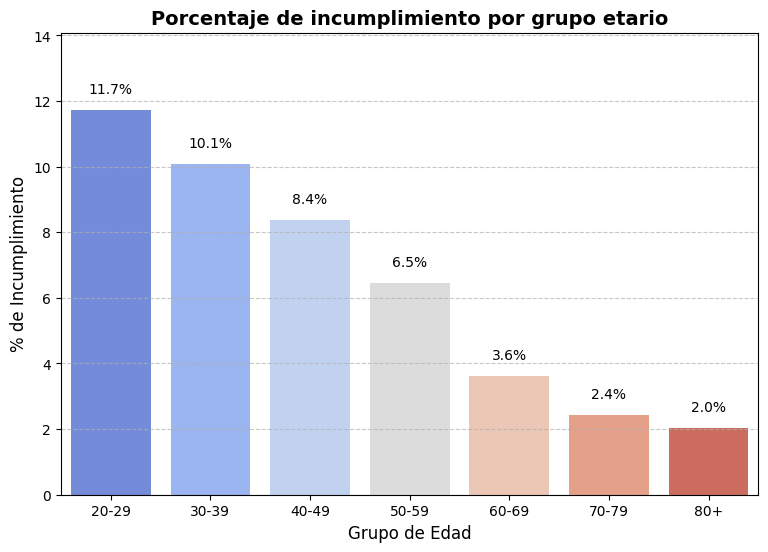

In [ ]:
# relacion entre la edad y el incumplimiento

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#organizacion
bins = [20, 30, 40, 50, 60, 70, 80, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
train_df['AgeGroup'] = pd.cut(train_df['age'], bins=bins, labels=labels, right=False)

#Calcular el porcentaje de incumplimiento por grupo de edad
age_default_rate = (
    train_df.groupby('AgeGroup')['SeriousDlqin2yrs']
    .mean()
    .reset_index()
)

#Convertir el valor en porcentaje
age_default_rate['SeriousDlqin2yrs'] = age_default_rate['SeriousDlqin2yrs'] * 100

# gráfico de barras
plt.figure(figsize=(9,6))
sns.barplot(
    x='AgeGroup',
    y='SeriousDlqin2yrs',
    data=age_default_rate,
    palette='coolwarm'
)

# caracteristicas del grafico
plt.title('Porcentaje de incumplimiento por grupo etario', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('% de Incumplimiento', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, age_default_rate['SeriousDlqin2yrs'].max() * 1.2)

# Mostrar valores encima de cada barra
for i, val in enumerate(age_default_rate['SeriousDlqin2yrs']):
    plt.text(i, val + 0.5, f'{val:.1f}%', ha='center', fontsize=10, color='black')

# Mostrar gráfico final
plt.show()


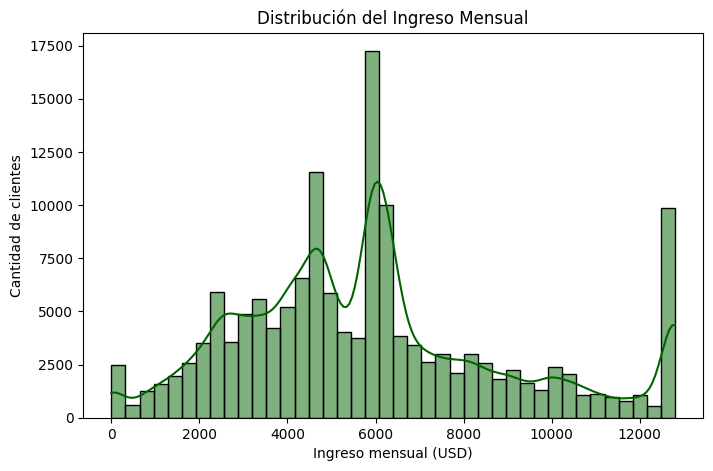

In [ ]:
# Distribución de ingresos mensuales
plt.figure(figsize=(8,5))
sns.histplot(train_df['MonthlyIncome'], bins=40, kde=True, color='darkgreen')
plt.title('Distribución del Ingreso Mensual')
plt.xlabel('Ingreso mensual (USD)')
plt.ylabel('Cantidad de clientes')
plt.show()


/tmp/ipython-input-2530395040.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('IncomeGroup')['SeriousDlqin2yrs']
/tmp/ipython-input-2530395040.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


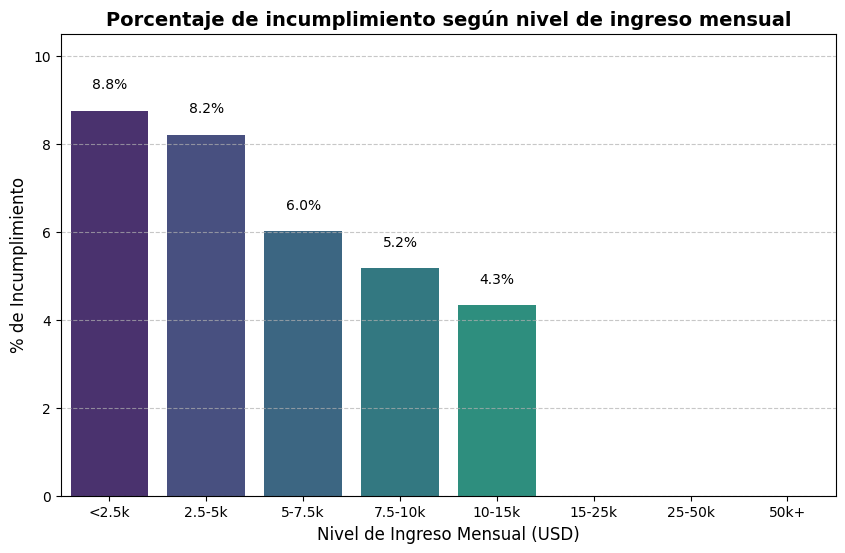

In [ ]:

# RELACIÓN ENTRE INGRESO MENSUAL Y PORCENTAJE DE INCUMPLIMIENTO

bins = [0, 2500, 5000, 7500, 10000, 15000, 25000, 50000, 100000]
labels = ['<2.5k', '2.5-5k', '5-7.5k', '7.5-10k', '10-15k', '15-25k', '25-50k', '50k+']
train_df['IncomeGroup'] = pd.cut(train_df['MonthlyIncome'], bins=bins, labels=labels, right=False)

# Calcular el porcentaje de incumplimiento por grupo de ingresos
income_default_rate = (
    train_df.groupby('IncomeGroup')['SeriousDlqin2yrs']
    .mean()
    .reset_index()
)

#Convertir el valor en porcentaje
income_default_rate['SeriousDlqin2yrs'] = income_default_rate['SeriousDlqin2yrs'] * 100

# gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(
    x='IncomeGroup',
    y='SeriousDlqin2yrs',
    data=income_default_rate,
    palette='viridis'
)

# caracteristicas del gráfico
plt.title('Porcentaje de incumplimiento según nivel de ingreso mensual', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Ingreso Mensual (USD)', fontsize=12)
plt.ylabel('% de Incumplimiento', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, income_default_rate['SeriousDlqin2yrs'].max() * 1.2)

# Mostrar valores encima de cada barra
for i, val in enumerate(income_default_rate['SeriousDlqin2yrs']):
    plt.text(i, val + 0.5, f'{val:.1f}%', ha='center', fontsize=10, color='black')


plt.show()


/tmp/ipython-input-1804065899.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('AgeGroup')['SeriousDlqin2yrs']
/tmp/ipython-input-1804065899.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


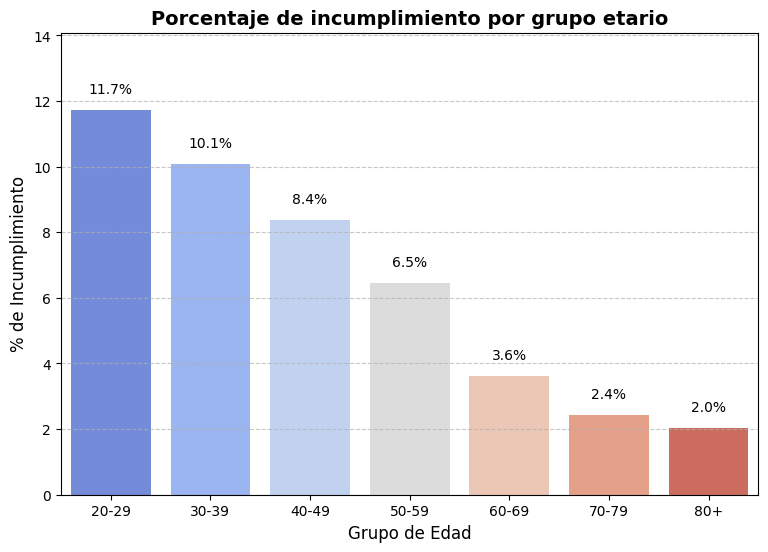

In [ ]:
# grupos etarios para facilitar la lectura visual
bins = [20, 30, 40, 50, 60, 70, 80, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
train_df['AgeGroup'] = pd.cut(train_df['age'], bins=bins, labels=labels, right=False)

# Calcular el porcentaje de incumplimiento por grupo de edad
age_default_rate = (
    train_df.groupby('AgeGroup')['SeriousDlqin2yrs']
    .mean()                                # Promedio del target (proporción de incumplimiento)
    .reset_index()
)

# Convertir el valor en porcentaje
age_default_rate['SeriousDlqin2yrs'] = age_default_rate['SeriousDlqin2yrs'] * 100

#  Crear gráfico de barras
plt.figure(figsize=(9,6))
sns.barplot(
    x='AgeGroup',
    y='SeriousDlqin2yrs',
    data=age_default_rate,
    palette='coolwarm'
)

#grafico
plt.title('Porcentaje de incumplimiento por grupo etario', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('% de Incumplimiento', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, age_default_rate['SeriousDlqin2yrs'].max() * 1.2)

# Mostrar valores encima de cada barra
for i, val in enumerate(age_default_rate['SeriousDlqin2yrs']):
    plt.text(i, val + 0.5, f'{val:.1f}%', ha='center', fontsize=10, color='black')

# 8️⃣ Mostrar gráfico final
plt.show()


/tmp/ipython-input-3928617206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SeriousDlqin2yrs', y='age', data=train_df, palette='mako')


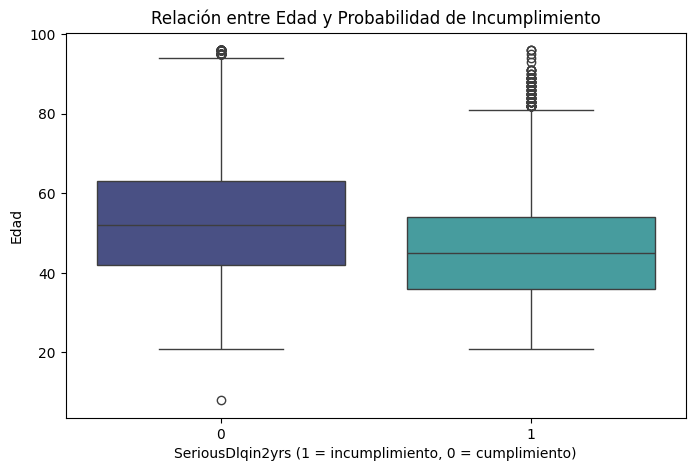

In [ ]:
# Relación edad vs incumplimiento
plt.figure(figsize=(8,5))
sns.boxplot(x='SeriousDlqin2yrs', y='age', data=train_df, palette='mako')
plt.title('Relación entre Edad y Probabilidad de Incumplimiento')
plt.xlabel('SeriousDlqin2yrs (1 = incumplimiento, 0 = cumplimiento)')
plt.ylabel('Edad')
plt.show()


/tmp/ipython-input-1465805818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=train_df, palette='coolwarm')


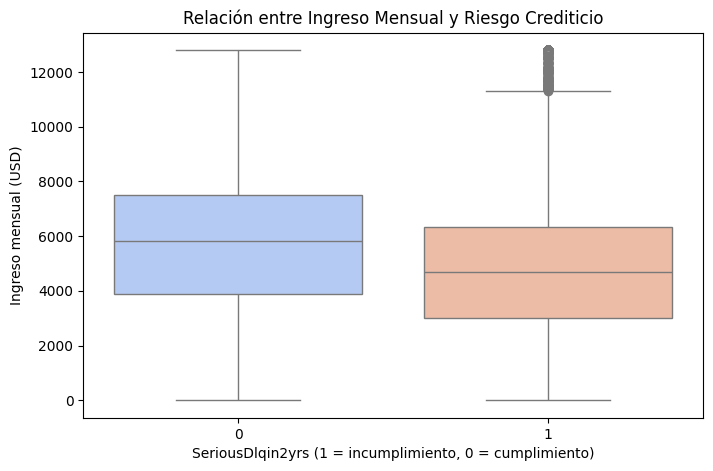

In [ ]:
# Relación ingreso vs incumplimiento
plt.figure(figsize=(8,5))
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=train_df, palette='coolwarm')
plt.title('Relación entre Ingreso Mensual y Riesgo Crediticio')
plt.xlabel('SeriousDlqin2yrs (1 = incumplimiento, 0 = cumplimiento)')
plt.ylabel('Ingreso mensual (USD)')
plt.show()


/tmp/ipython-input-3541955619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SeriousDlqin2yrs', y='DebtRatio', data=train_df, palette='cubehelix')


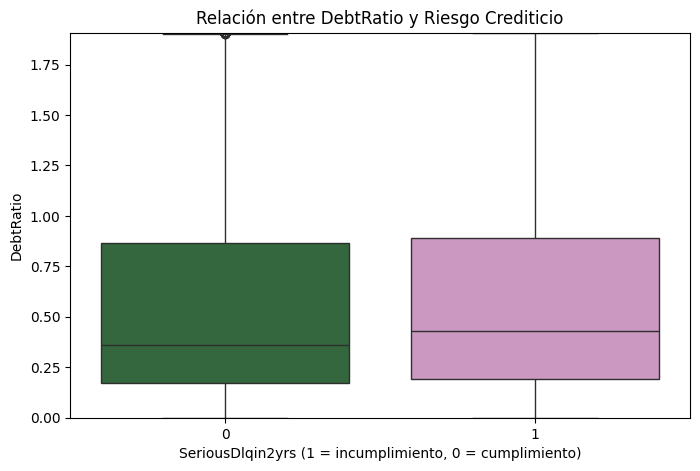

In [ ]:
# Relación DebtRatio vs riesgo crediticio
plt.figure(figsize=(8,5))
sns.boxplot(x='SeriousDlqin2yrs', y='DebtRatio', data=train_df, palette='cubehelix')
plt.title('Relación entre DebtRatio y Riesgo Crediticio')
plt.xlabel('SeriousDlqin2yrs (1 = incumplimiento, 0 = cumplimiento)')
plt.ylabel('DebtRatio')
plt.ylim(0, train_df['DebtRatio'].quantile(0.95))  # limitar outliers extremos
plt.show()


/tmp/ipython-input-3161930342.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumberOfDependents', y='SeriousDlqin2yrs', data=train_df, palette='crest')


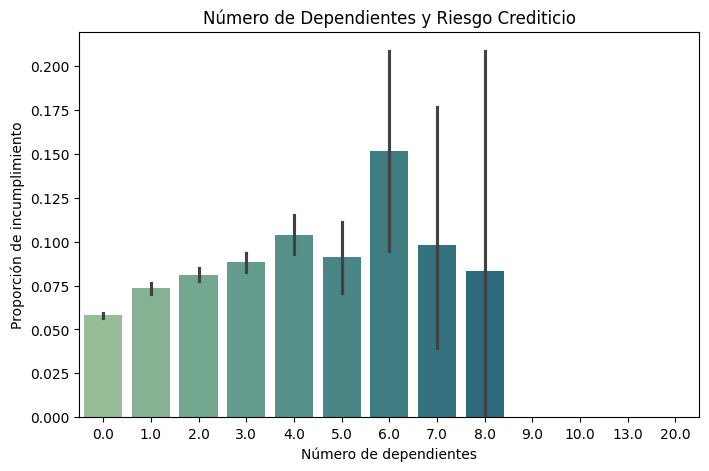

In [ ]:
# Dependientes vs incumplimiento
plt.figure(figsize=(8,5))
sns.barplot(x='NumberOfDependents', y='SeriousDlqin2yrs', data=train_df, palette='crest')
plt.title('Número de Dependientes y Riesgo Crediticio')
plt.xlabel('Número de dependientes')
plt.ylabel('Proporción de incumplimiento')
plt.show()


/tmp/ipython-input-2229897590.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morosos['TieneDependientes'] = morosos['NumberOfDependents'].apply(lambda x: 'Con dependientes' if x > 0 else 'Sin dependientes')


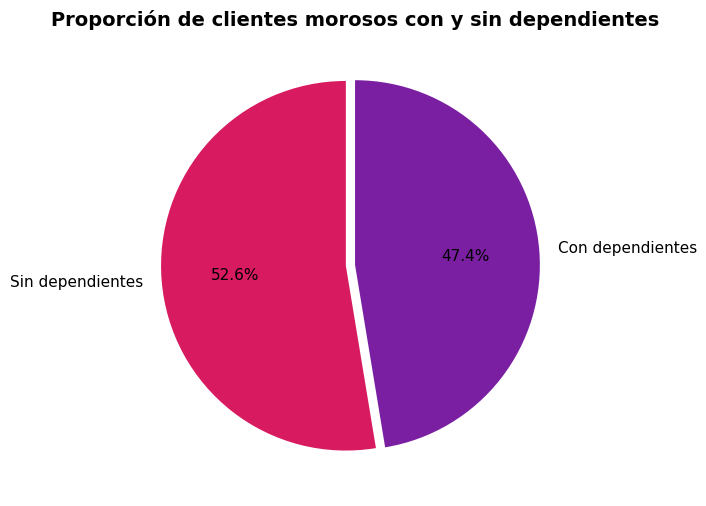

In [ ]:
# torta con comparacion entre clientes morosos con dependientes y sin


# Filtrar solo los clientes morosos (SeriousDlqin2yrs = 1)
morosos = train_df[train_df['SeriousDlqin2yrs'] == 1]

# Clasificar según si tienen dependientes o no
morosos['TieneDependientes'] = morosos['NumberOfDependents'].apply(lambda x: 'Con dependientes' if x > 0 else 'Sin dependientes')

# se contabilizan
dependientes_counts = morosos['TieneDependientes'].value_counts()

# paramentros esteticos
colors = ['#D81B60', '#7B1FA2']  # rosa fuerte y violeta

# Crear el gráfico de torta
plt.figure(figsize=(6,6))
plt.pie(
    dependientes_counts,
    labels=dependientes_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.05, 0),
    textprops={'fontsize': 11, 'color': 'black'}
)

# Personalizar el gráfico
plt.title('Proporción de clientes morosos con y sin dependientes', fontsize=14, fontweight='bold')
plt.show()
